In [5]:
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
PATH='data10/'

In [7]:
data=pd.read_csv(PATH+'channels_paramsCF.csv',index_col='Index')

In [8]:
data.columns

Index(['id', '0.0', '50.0', '50.05', '50.1', '50.15', '50.2', '50.25', '50.3',
       '50.35',
       ...
       '49.7', '49.75', '49.8', '49.85', '49.9', '49.95', '4.95', '0.45',
       'File', 'Channel'],
      dtype='object', length=2504)

In [9]:
data1=data

data1['Channel']=data1['Channel'].astype('str')
data1['fullname']=data['File']+data['Channel']

In [10]:
data1['fullname'].unique()

array(['data10/1.edf19', 'data10/2.edf7', 'data10/2.edf9',
       'data10/3.edf7', 'data10/3.edf8', 'data10/3.edf9',
       'data10/4.edf15', 'data10/5.edf14', 'data10/6.edf14',
       'data10/7.edf21'], dtype=object)

In [11]:
lowF=['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
HiF=['10.0','10.1','10.2','10.3','10.4','10.5','10.6','10.7','10.8','10.9','11.0','11.1','11.2','11.3','11.4','11.5','11.6','11.7','11.8','11.9',
     '12.0','12.1','12.2','12.3','12.4','12.5','12.6','12.7','12.8','12.9','13.0','13.1','13.2','13.3','13.4','13.5','13.6','13.7','13.8','13.9',
     '14.0','14.1','14.2','14.3','14.4','14.5','14.6','14.7','14.8','14.9','15.0']

data1['LF']=0
for frq in lowF:
    data1['LF']=data1['LF']+data1[frq]*data1[frq]
data1['LF']=data1['LF']/1251

data1['HF']=0
for frq in HiF:
    data1['HF']=data1['HF']+data1[frq]*data1[frq]
data1['HF']=data1['HF']/1251

In [12]:
data2=data1.join(pd.DataFrame(data1.groupby(['fullname'])['LF'].mean()).reset_index().set_index('fullname'),on='fullname', rsuffix='_mean')

In [14]:
data2['LF_rel']=data2['LF']/data2['LF_mean']

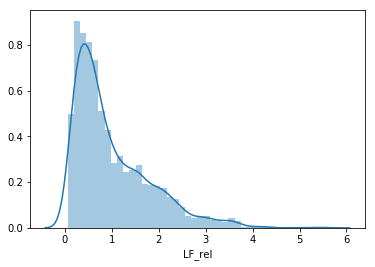

In [38]:
sns.distplot(data2[data2['fullname']=='data10/1.edf19']['LF_rel'])

In [21]:
data3=data1.join(pd.DataFrame(data1.groupby(['fullname'])['HF'].mean()).reset_index().set_index('fullname'),on='fullname', rsuffix='_mean')

In [23]:
data3['HF_rel']=data3['HF']/data3['HF_mean']

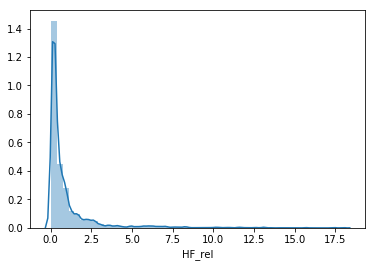

In [42]:
pl=sns.distplot(data3[data3['fullname']=='data10/1.edf19']['HF_rel'])
axes=pl.axes
#axes.set_ylim(0,0.05)
axes.set_xlim(0,5)